<a href="https://colab.research.google.com/github/ezahner/IDS/blob/main/Project4/Project4_Part1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Erin Zahner
--

**Project 4 - Part 1 - R**
--

In [1]:
#read file
library(readr)
data <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv", show_col_types = FALSE)

In [2]:
#print summary of data
summary(data)

      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

____________________________________________________________________________________________________
Before doing any other analysis or manipulation of data, we must cleanse it of noise. Here, we can see that we need to replace the 0 values in capital-gain and capital-loss, as well as, the values of 99999 in capital-gain.
____________________________________________________________________________________________________

In [3]:
#clean up noise
data$`capital-gain` <- ifelse(data$`capital-gain` == 0, yes = NA, no = data$`capital-gain`)
data$`capital-gain` <- ifelse(data$`capital-gain` == 99999, yes = NA, no = data$`capital-gain`)
data$`capital-loss` <- ifelse(data$`capital-loss` == 0, yes = NA, no = data$`capital-loss`)

#replace NA with mean
data$`capital-gain` <- ifelse(is.na(data$`capital-gain`), yes = mean(data$`capital-gain`, na.rm=TRUE), no = data$`capital-gain`)
data$`capital-loss` <- ifelse(is.na(data$`capital-loss`), yes = mean(data$`capital-loss`, na.rm=TRUE), no = data$`capital-loss`)

#make sure sum is 0
sum(is.na(data))

summary(data)

[1] 0

      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss 
 Length:14797       Length:14797       Min.   :  114   Min.   : 213  
 Class :character   Class :character   1st Qu.: 7637   1st Qu.:1878  
 Mode  :character   Mode  :character   Median : 7637   Median :1878  
                                       Mean   : 7637   Mean   :1878  
                                       3rd Qu.: 7637   3rd Qu.:1878  
                                       Max.   :41310   Max.   :4356  
    income   

____________________________________________________________________________________________________
Here, I changed all the noise to nan and imputed the mean into all of the nan values.
____________________________________________________________________________________________________

In [4]:
#create contingency table of workclass and sex
class_sex_table <- table(data$sex, data$workclass)
print(class_sex_table)

        
            ? Federal-gov Local-gov Never-worked Private Self-emp-inc
  Female  377         149       377            1    3574           54
  Male    452         305       592            4    6707          444
        
         Self-emp-not-inc State-gov Without-pay
  Female              178       201           1
  Male                992       385           4


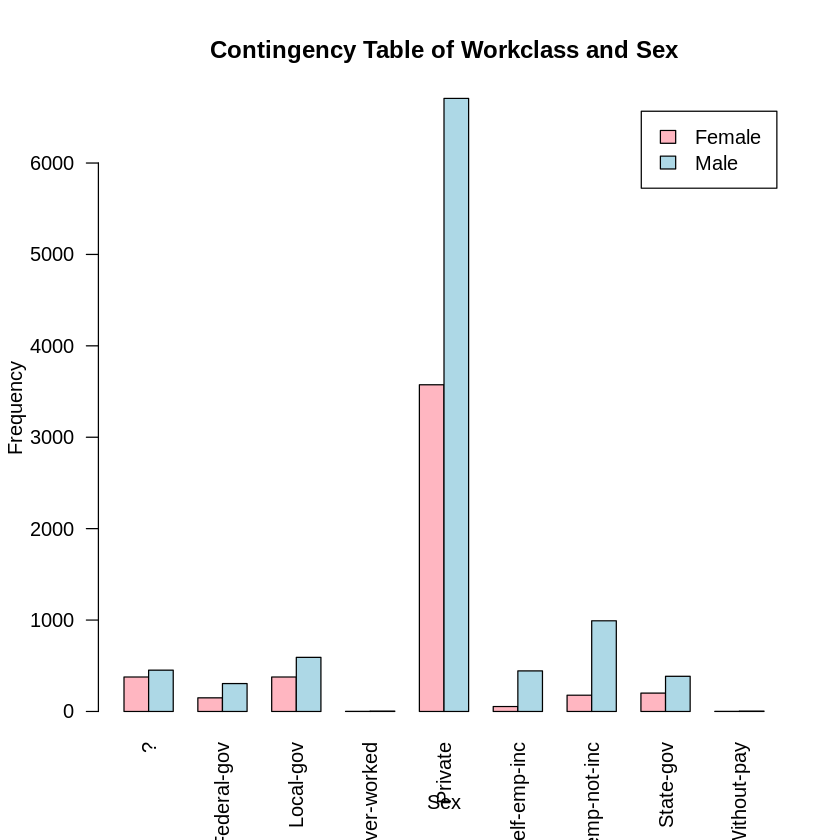

In [5]:
#plot contingency table for workclass and sex
barplot(class_sex_table, beside=TRUE,
        legend = rownames(class_sex_table),
        col = c("lightpink", "lightblue"),
        main = "Contingency Table of Workclass and Sex",
        xlab = "Sex",
        ylab = "Frequency",
         las = 2) #las rotates x labels so there is room for all of them

____________________________________________________________________________________________________
Next, I made a contingency table for working class and sex and plotted it on a barplot. From the results, we can see that a majority of females and males work for private corporations and almost none have never worked or work wihout pay.
____________________________________________________________________________________________________

In [6]:
#create contingency table for sex and marital status
sex_martial_table <- table(data$sex, data$`marital-status`)
print(sex_martial_table)

        
         Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent
  Female     1219                 7                761                    95
  Male        795                 4               6010                   104
        
         Never-married Separated Widowed
  Female          2160       290     380
  Male            2717       182      73


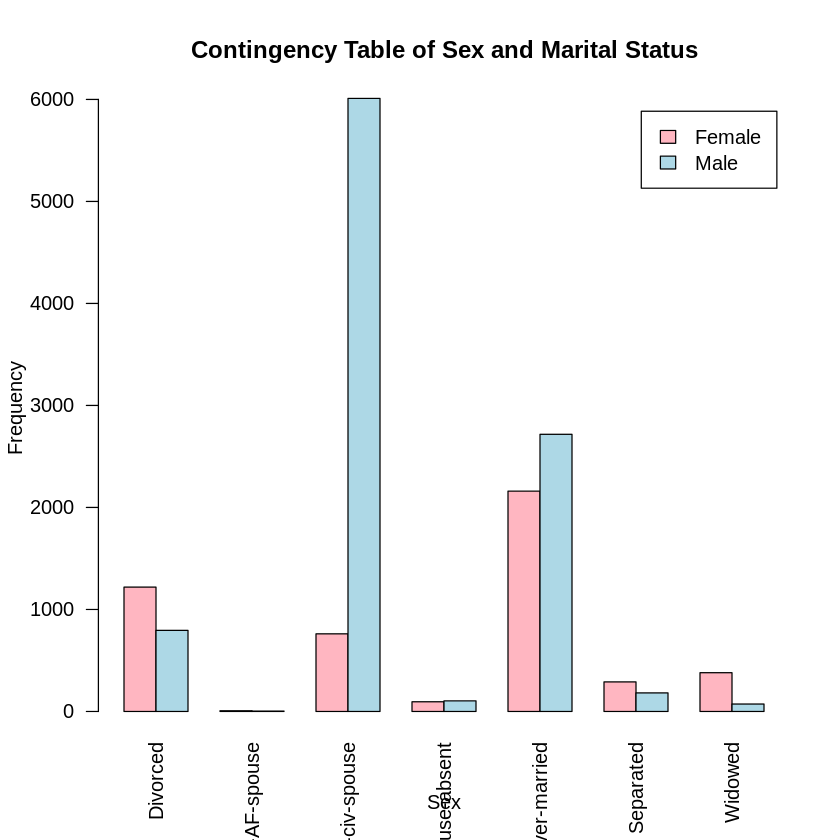

In [7]:
#plot contingency table for sex and marital status
barplot(sex_martial_table, beside=TRUE,
        legend = rownames(sex_martial_table),
        col = c("lightpink", "lightblue"),
        main = "Contingency Table of Sex and Marital Status",
        xlab = "Sex",
        ylab = "Frequency",
        las=2)

____________________________________________________________________________________________________
Then, I made a contingency table for marital status and sex and plotted it on a barplot. From these results, we can see that more males than females are married-civ-spouse, meaning they are married to a civilian spouse. We can also see that more females than males are divorced or widowed.
____________________________________________________________________________________________________

In [8]:
#create a new data frame, adultOver40, for those whose age > 40
adultOver40 <- data[data$age > 40, ]

In [9]:
#recreate the contingency table of sex and marital status for adultOver40.
sex_martial_Over40_table <- table(adultOver40$sex, adultOver40$`marital-status`)
print(sex_martial_Over40_table)

        
         Divorced Married-civ-spouse Married-spouse-absent Never-married
  Female      720                305                    38           256
  Male        448               3383                    47           315
        
         Separated Widowed
  Female       133     354
  Male          74      71


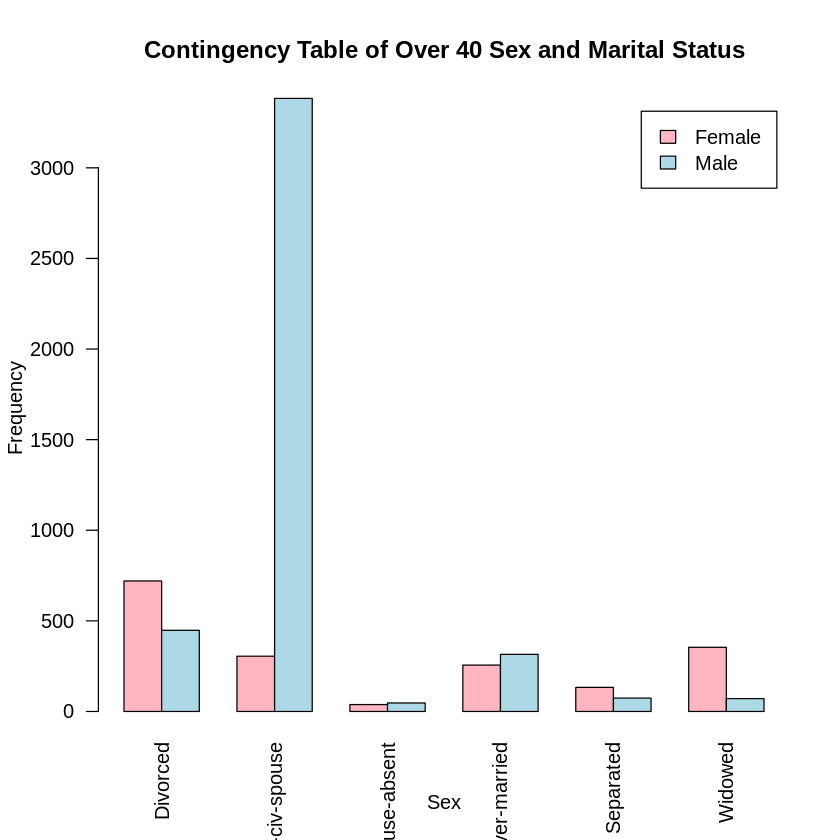

In [10]:
barplot(sex_martial_Over40_table, beside=TRUE,
        legend = rownames(sex_martial_table),
        col = c("lightpink", "lightblue"),
        main = "Contingency Table of Over 40 Sex and Marital Status",
        xlab = "Sex",
        ylab = "Frequency",
        las=2)

____________________________________________________________________________________________________
Here, we have a contingency table for marital-status and sex, but only looking at adults over 40. There is still a great number of males under married-civ-spouse, however, the results are halved. The marital status that seems to be changed the most when looking at adults over 40 is those who answered never-married. It appears that it is moslty younger people who answered never-married.
____________________________________________________________________________________________________

In [11]:
#determine whether any outliers exist for the education field
data$scaled_education <- scale(data$education)
three_sigma_rule <- (data$scaled_education < -3 |
                     data$scaled_education > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")



There are 113 outliers 



In [12]:
#scale age
data$scaled_age <- scale(data$age)

#find outliers
three_sigma_rule <- (data$scaled_age < -3 |
                     data$scaled_age > 3 )

#get num of outliers
num_outliers <- sum(three_sigma_rule)

#find most extreme outlier
most_extreme_outlier_index <- which.max(abs(data$scaled_age))

#get the original age corresponding to the most extreme outlier
most_extreme_outlier_age <- data$age[most_extreme_outlier_index]

# print findings
cat ("There are", num_outliers, "outliers \n\n")

cat("Most extreme outlier:", most_extreme_outlier_age, "\n")

There are 60 outliers 

Most extreme outlier: 90 


____________________________________________________________________________________________________
Next, I scaled the age column and used the three sigma rule to determine if there are any outliers in the age data. I found that there are 60 outliers in the age column and the most extreme outlier is the age of 90.
____________________________________________________________________________________________________

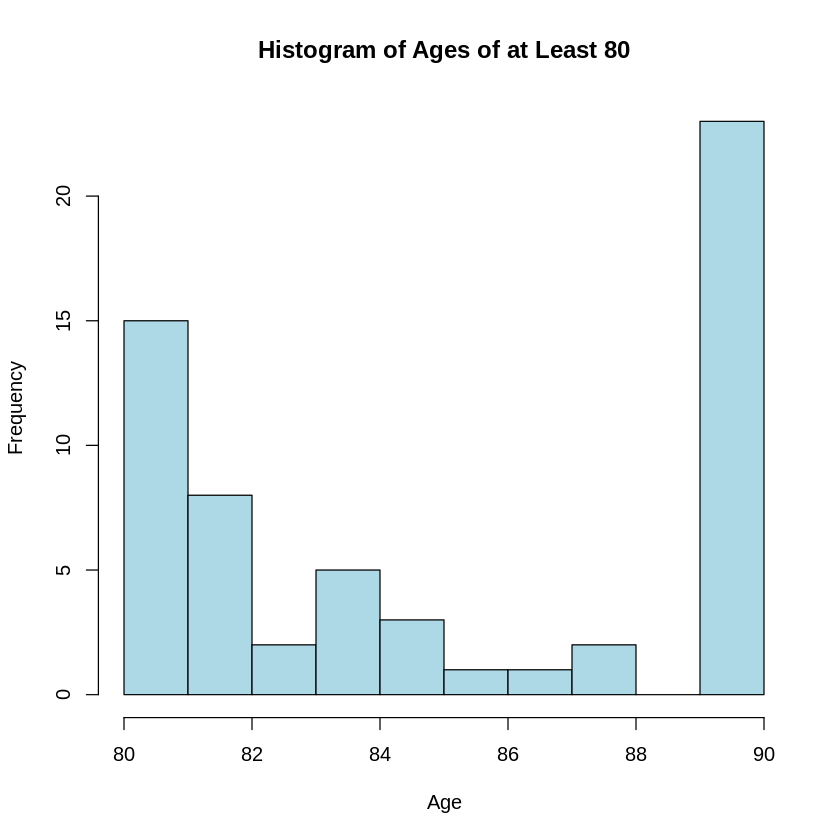

In [13]:
#create subset of ages of at least 80
age_anomaly <- data[data$age >= 80 , ]

#histogram of ages of at least 80
hist(age_anomaly$age, col="lightblue",
     main = "Histogram of Ages of at Least 80",
     xlab = "Age",
     ylab = "Frequency",
     breaks=10)




____________________________________________________________________________________________________
From this histogram of the age anomalies, we can see that there are many participants who are of the age of 89-90.
____________________________________________________________________________________________________



---

**Conclusion** After cleaning the data and removing any 0 or 99999 values, we could see some interesting trends within the data. These include the majority of the males and females working in the private working class and the majorty of males being married to civilians. Additionally, when I reduced the sample to adults over 40, we could see that the number of respondents answering "never married", for both males and females, drastically decreased. As I said previously, this shows that most of the respondents who answered as such were younger. After looking at another subset of the data, we found that of those who were 80 or older, most of the respondents were 89-90. These tests show how much more information you can find about trends and relationships you can find when you look at specific parts of the data, whether it be by column or even seperated by data within the columns.

---

